### The purpose of this notebook is to further analyze the *E. faecalis* assemblies for resistance genes, virulence factors, and plasmids by running [abricate](https://github.com/tseemann/abricate), which uses differernt databases such as NCBI AMRFinderPlus, VFDB and PlasmidFinder respectively 

#### Total number of *E. faecalis* asemblies - 365

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
ncbi_df = pd.read_csv("Efaecalis_abricate_ncbi_result.tab", delimiter="\t")

In [3]:
ncbi_df.head()

,#FILE,GENE,%IDENTITY,DATABASE,ACCESSION,PRODUCT
0,SS-0005_assembly.fasta,dfrE,98.99,ncbi,NG_055770.1,trimethoprim-resistant dihydrofolate reductase...
1,SS-0005_assembly.fasta,lsa(A),98.66,ncbi,NG_055640.1,ABC-F type ribosomal protection protein Lsa(A)
2,SWEntR-0295_assembly.fasta,dfrE,97.58,ncbi,NG_055770.1,trimethoprim-resistant dihydrofolate reductase...
3,SWEntR-0295_assembly.fasta,lsa(A),99.40,ncbi,NG_047931.1,ABC-F type ribosomal protection protein Lsa(A)
4,NS-0747_assembly.fasta,lsa(A),98.93,ncbi,NG_047931.1,ABC-F type ribosomal protection protein Lsa(A)


In [5]:
ncbi_df.shape

(1527, 6)

In [6]:
ncbi_df.isnull().values.any()

False

In [7]:
ncbi_df.isnull().sum().sum() #No null values

0

In [8]:
#This provides the unique genes in the assemblies
ncbi_df['GENE'].unique()

array(['dfrE', 'lsa(A)', 'tet(M)', 'erm(B)', 'dfrF', 'tet(L)',
       "aph(3')-IIIa", 'sat4', 'ant(6)-Ia', "aph(2'')-IIIa",
       "aph(2'')-Ih", 'cfr(C)', 'tet(O)', 'fexA', 'optrA', 'str', 'dfrG',
       'catA8', 'lnu(B)', 'lsa(E)', 'spw', 'tet(S)', 'catA7', 'msr(C)',
       'eat(A)', "aac(6')-Ii", 'aadE', 'lnu(G)', 'ant(9)-Ib', 'dfrC',
       'tet(W)', 'erm(A)', 'cat-TC', "aph(2'')-If", 'catP'], dtype=object)

In [9]:
#The count of the occurence of genes above 8

gene_vc = ncbi_df['GENE'].value_counts()
ncbi_gene_list = gene_vc[gene_vc >= 8] #Listing gene with at least 8 counts
ncbi_gene_list

dfrE            363
lsa(A)          360
tet(M)          248
erm(B)          181
aph(3')-IIIa     83
sat4             71
ant(6)-Ia        35
tet(L)           34
dfrG             33
aph(2'')-Ih      15
lnu(B)           14
lsa(E)           13
spw              13
str              10
optrA             8
dfrF              8
fexA              8
Name: GENE, dtype: int64

In [10]:
#These are the unique gene products available in the assemblies 

ncbi_df['PRODUCT'].unique()

array(['trimethoprim-resistant dihydrofolate reductase DfrE',
       'ABC-F type ribosomal protection protein Lsa(A)',
       'tetracycline resistance ribosomal protection protein Tet(M)',
       '23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(B)',
       'trimethoprim-resistant dihydrofolate reductase DfrF',
       'tetracycline efflux MFS transporter Tet(L)',
       "aminoglycoside O-phosphotransferase APH(3')-IIIa",
       'streptothricin N-acetyltransferase Sat4',
       'aminoglycoside nucleotidyltransferase ANT(6)-Ia',
       "aminoglycoside O-phosphotransferase APH(2'')-IIIa",
       "aminoglycoside O-phosphotransferase APH(2'')-Ih",
       '23S rRNA (adenine(2503)-C(8))-methyltransferase Cfr(C)',
       'tetracycline resistance ribosomal protection protein Tet(O)',
       'chloramphenicol/florfenicol efflux MFS transporter FexA',
       'ABC-F type ribosomal protection protein OptrA',
       'streptomycin adenylyltransferase Str',
       'trimethoprim-resistant dihydrofola

In [11]:
#Value counts of the gene products which is the same as the gene counts above 8

ncbi_product = ncbi_df['PRODUCT'].value_counts()
ncbi_product[ncbi_product >= 8]

trimethoprim-resistant dihydrofolate reductase DfrE            363
ABC-F type ribosomal protection protein Lsa(A)                 360
tetracycline resistance ribosomal protection protein Tet(M)    248
23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(B)         181
aminoglycoside O-phosphotransferase APH(3')-IIIa                83
streptothricin N-acetyltransferase Sat4                         71
aminoglycoside nucleotidyltransferase ANT(6)-Ia                 35
tetracycline efflux MFS transporter Tet(L)                      34
trimethoprim-resistant dihydrofolate reductase DfrG             33
aminoglycoside O-phosphotransferase APH(2'')-Ih                 15
lincosamide nucleotidyltransferase Lnu(B)                       14
ABC-F type ribosomal protection protein Lsa(E)                  13
ANT(9) family aminoglycoside nucleotidyltransferase Spw         13
streptomycin adenylyltransferase Str                            10
trimethoprim-resistant dihydrofolate reductase DfrF           

In [117]:
print(type(ncbi_gene_list))
ncbi_gene_list.values

<class 'pandas.core.series.Series'>


array([363, 360, 248, 181,  83,  71,  35,  34,  33,  15,  14,  13,  13,
        10,   8,   8,   8])

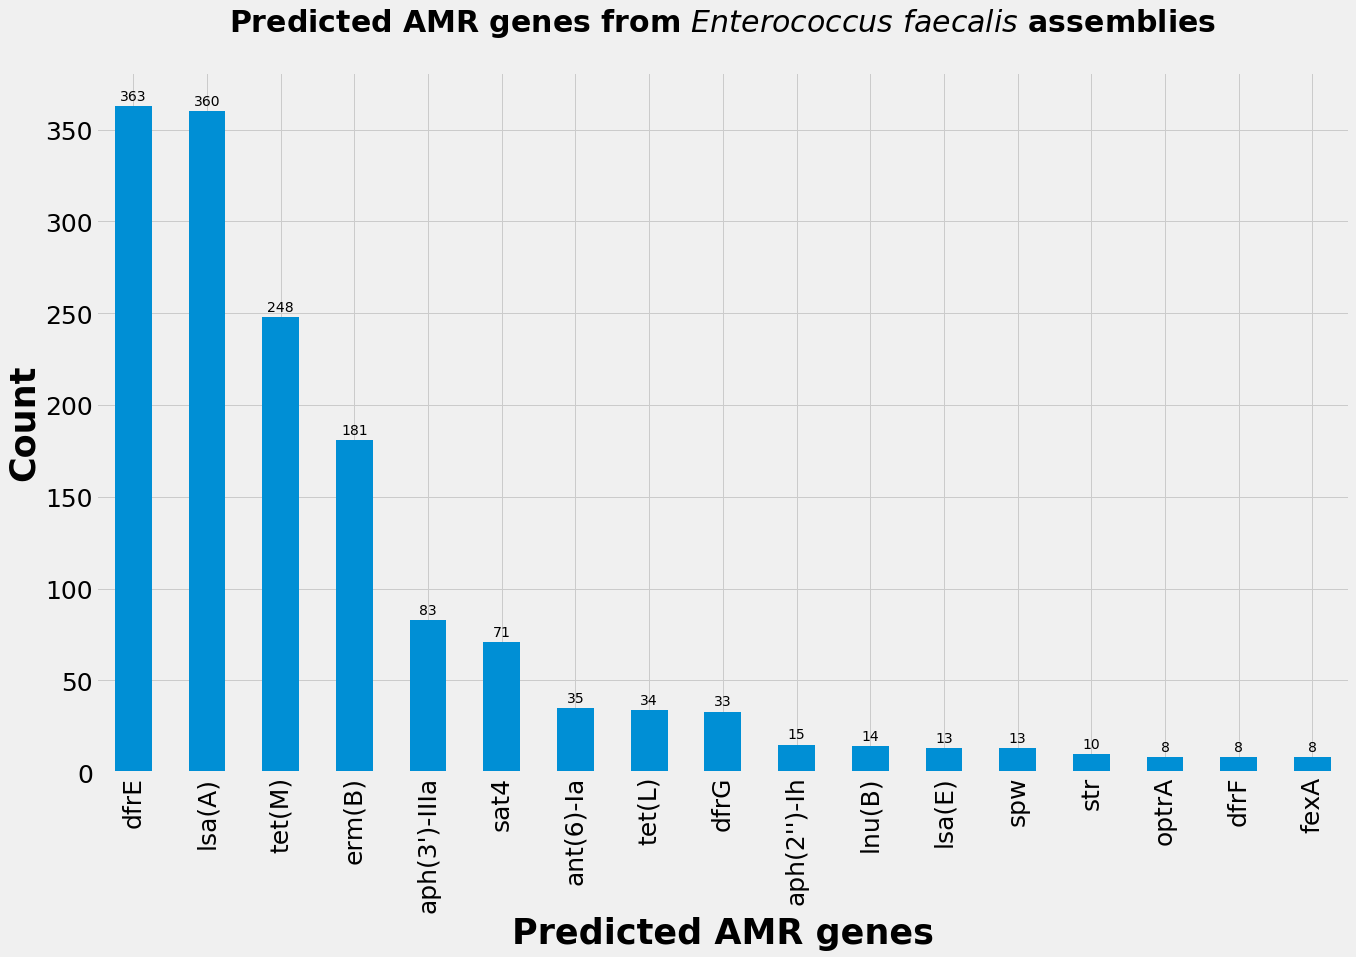

In [37]:
#The graph of the AMR genes to number of times it is predicted. 

plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelweight'] = 'bold'
p_object = ncbi_gene_list.plot(kind = 'bar', figsize = (20, 12), fontsize = 25)
ttl = plt.title(r'Predicted AMR genes from $Enterococcus$ $faecalis$ assemblies', fontsize = 30, fontweight = 'bold')
ttl.set_position([.5,1.05]) # This is for creating distance between plots and title
plt.xlabel("Predicted AMR genes", fontsize = 35)
plt.ylabel("Count", fontsize = 35)
#For text annotation of bar plot 
for p in p_object.patches:
    p_object.annotate(format(p.get_height()), (p.get_x() + p.get_width() /2, p.get_height()), ha = 'center', \
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')

           


In [126]:
#This gives a table of the assemblies with more than 8 AMR gene predictions

pd.options.display.float_format = '{:,.0f}'.format
x = ncbi_df.groupby(["#FILE"], axis = 0).count()
ncbi_AMR_gene_series = ncbi_df.groupby(["#FILE"]).count()[x > 8].dropna(axis = 0)["GENE"]
ncbi_AMR_gene_df = pd.DataFrame ({"Isolate_ID" : ncbi_AMR_gene_series.index, "Number_of_Predicted_AMR_genes": \
                                   ncbi_AMR_gene_series.values})
ncbi_AMR_gene_by_isolate = ncbi_AMR_gene_df.sort_values(by = "Number_of_Predicted_AMR_genes", ascending = False).reset_index().drop(['index'], \
                                                        axis = 1)

ncbi_AMR_gene_by_isolate

,Isolate_ID,Number_of_Predicted_AMR_genes
0,ES-C-ST001-15JUN15-0096J_assembly.fasta,13
1,SWEntR-0325_assembly.fasta,12
2,ES-C-ST002-25AUG14-0040A_assembly.fasta,12
3,NS-0642_assembly.fasta,12
4,ES-C-ST002-25AUG14-0040K_assembly.fasta,12
5,ES-S-FC404-20JUL15-0555B_assembly.fasta,12
6,ES-M-ST002-15SEP15-0125I_assembly.fasta,11
7,ES-S-FC400-14MAR16-0827I_assembly.fasta,11
8,ES-M-ST001-13OCT14-0050B_assembly.fasta,11
9,ES-C-ST002-07DEC15-0142J_assembly.fasta,10


In [20]:
import os
os.getcwd()

'/Users/martloni/AMR_Transmission/E_faecalis_analysis'

### Analyzing data using the PlasmidFinder database

In [21]:
p_finder_df = pd.read_csv("Efaecalis_abricate_pfinder_result.tab", delimiter = "\t")

In [22]:
p_finder_df.head()

,#FILE,GENE,%IDENTITY,DATABASE,ACCESSION,PRODUCT
0,ES-C-ST001-27APR15-0081K_assembly.fasta,repUS43_1_CDS12738(DOp1),100.0,plasmidfinder,CP003584,repUS43_1_CDS12738(DOp1)_CP003584
1,NS-0079_assembly.fasta,repUS43_1_CDS12738(DOp1),100.0,plasmidfinder,CP003584,repUS43_1_CDS12738(DOp1)_CP003584
2,ES-M-ST001-23NOV14-0060I_assembly.fasta,rep9b_3_repA(pMG2200),100.0,plasmidfinder,AB374546,rep9b_3_repA(pMG2200)_AB374546
3,ES-M-ST001-23NOV14-0060I_assembly.fasta,repUS43_1_CDS12738(DOp1),100.0,plasmidfinder,CP003584,repUS43_1_CDS12738(DOp1)_CP003584
4,ES-M-ST001-21JUL14-0029I_assembly.fasta,repUS43_1_CDS12738(DOp1),100.0,plasmidfinder,CP003584,repUS43_1_CDS12738(DOp1)_CP003584


In [23]:
p_finder_df.shape

(657, 6)

In [28]:
#Get plasmid name from the gene column which are known plasmids associated with Enterococcus Faecalis genomes which
#are available on NCBI database

p_finder_df['PLASMID_NAME'] = p_finder_df['GENE'].apply(lambda x: "Plasmid_" + (x[:-1].split("(")[1])) 
p_finder_df["PLASMID_NAME"].unique()

array(['Plasmid_DOp1', 'Plasmid_pMG2200', 'Plasmid_pAD1', 'Plasmid_pS86',
       'Plasmid_pTEF3', 'Plasmid_pEJ97p1', 'Plasmid_pVEF1',
       'Plasmid_pSMA198', 'Plasmid_pEF1071', 'Plasmid_EF62pC',
       'Plasmid_pEFNP1', 'Plasmid_pSM19035', 'Plasmid_pRE25',
       'Plasmid_pJS33', 'Plasmid_EFD32pB', 'Plasmid_pK214',
       'Plasmid_pSK41', 'Plasmid_pCF10', 'Plasmid_pBEE99',
       'Plasmid_pE394', 'Plasmid_pPD1', 'Plasmid_pVEF3', 'Plasmid_pTW9',
       'Plasmid_pS194', 'Plasmid_pTEF2', 'Plasmid_pEF418',
       'Plasmid_pTEF1', 'Plasmid_pKL0018', 'Plasmid_pAM373',
       'Plasmid_EF62pB', 'Plasmid_DOp2', 'Plasmid_pCRL2911',
       'Plasmid_PML21'], dtype=object)

In [29]:
#This provides the replicon genes which suggest that the above plasmids are present 

p_finder_series = p_finder_df['GENE'].value_counts()
p_finder_series

repUS43_1_CDS12738(DOp1)          241
rep9b_3_repA(pMG2200)             116
rep9a_1_repA(pAD1)                 57
rep6_1_repA(pS86)                  42
repUS11_rep(pTEF3)                 39
rep9b_2_prgW(EF62pC)               16
rep11b_1_repA(pEF1071)             16
rep8b_1_repA(pEJ97p1)              15
rep2_1_orf1(pRE25)                 13
rep9c_3_repA(pPD1)                 11
rep11c_2_repA(pJS33)               11
rep7a_8_ORF11(pRE25)                8
rep1_2_repS(pSM19035)               7
rep9c_2_prgW(pCF10)                 6
rep33_1_rep(pSMA198)                6
repUS1_2_rep(pVEF3)                 5
rep14a_1_CDS2(pEFNP1)               5
rep9c_1_repA(pTW9)                  5
rep9c_4_prgW(EF62pB)                4
rep7a_17_CDS4(pS194)                4
repUS1_3_rep(pVEF1)                 4
repUS26_1_EFD32pB0001(EFD32pB)      3
rep9b_1_prgW(pBEE99)                3
rep9b_4_repA2(pTEF2)                3
repUS41_1_repB(PML21)               3
rep8a_1_EP002(pAM373)               2
rep1_9_repE(

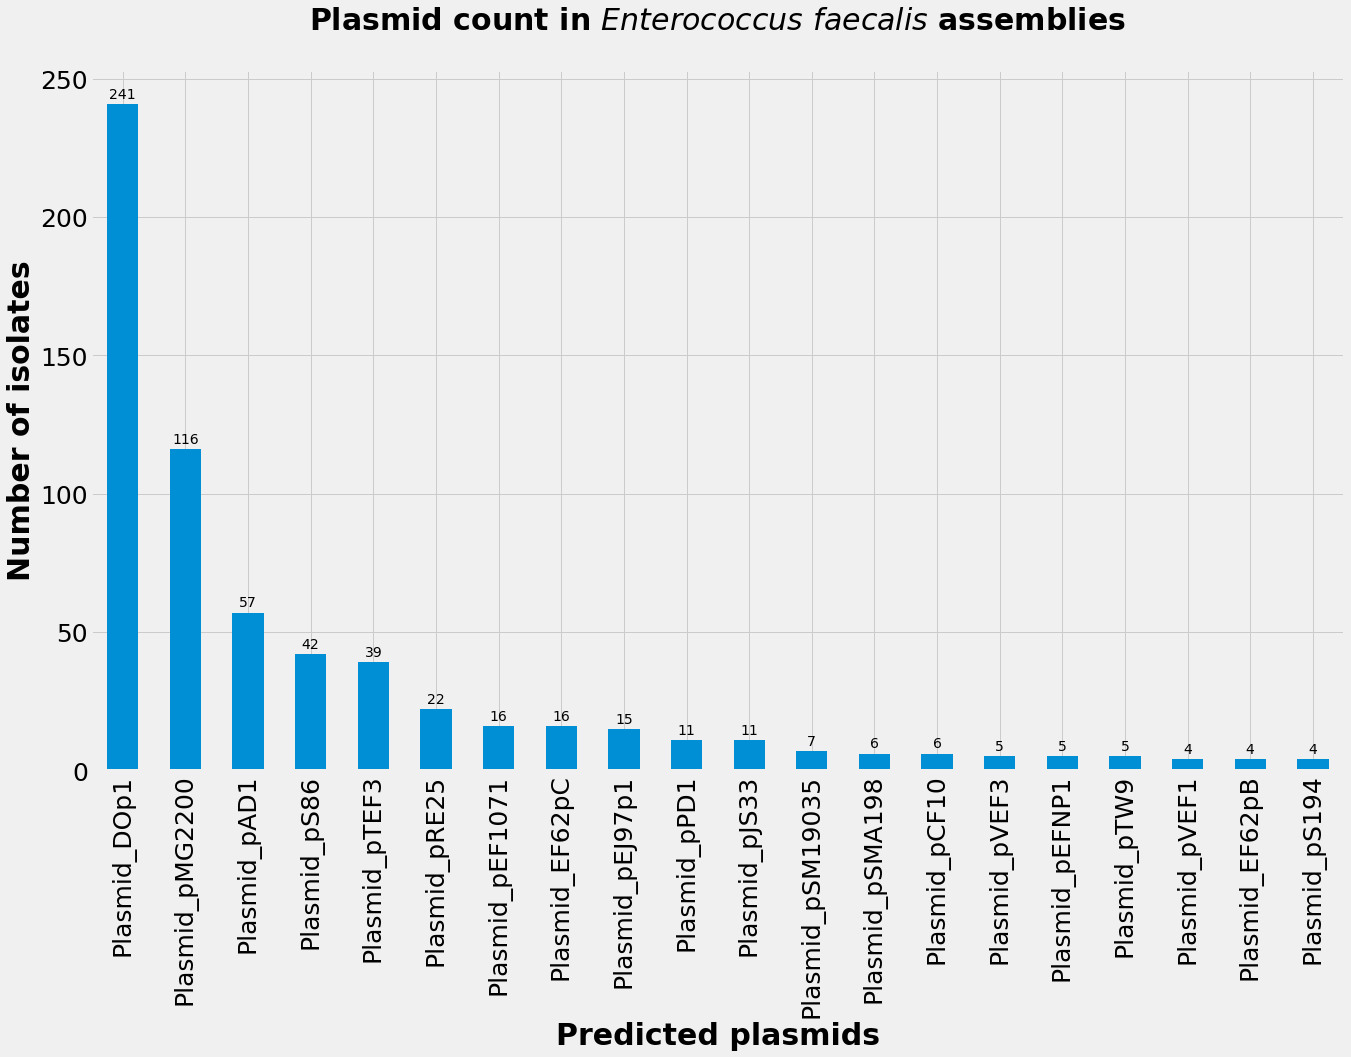

In [140]:
#Graph of predicted plasmids with total number of Enterococcus faecium isolates with that plasmids. 

p_plasmid_ser = p_finder_df['PLASMID_NAME'].value_counts()
p_plasmid_ser = p_plasmid_ser[p_plasmid_ser >= 4].plot(kind = 'bar', figsize = (20, 12), fontsize = 25)
ttl = plt.title(r'Plasmid count in $Enterococcus$ $faecalis$ assemblies', fontsize = 30, fontweight = 'bold')
ttl.set_position([.5,1.05])
plt.xlabel("Predicted plasmids", fontsize = 30)
plt.ylabel("Number of isolates", fontsize = 30)

for p in p_plasmid_ser.patches:
    p_plasmid_ser.annotate(format(p.get_height()), (p.get_x() + p.get_width() /2, p.get_height()), ha = 'center', \
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [144]:
#This gives the number of predictied plasmid in each isolate

p_finder_gb_series = p_finder_df.groupby("#FILE").count()['PLASMID_NAME']
isolate_and_plasmid_count_df = pd.DataFrame ({"Isolate_ID" : p_finder_gb_series.index, "Number of plasmid(s)": p_finder_gb_series.values})
isolate_and_plasmid_count_df = isolate_and_plasmid_count_df.sort_values(by=["Number of plasmid(s)"], \
        ascending = False).reset_index().drop(['index'], axis = 1)
isolate_and_plasmid_count_df

,Isolate_ID,Number of plasmid(s)
0,ES-S-FC504-20JUL15-0557I_assembly.fasta,5
1,ES-S-FC504-20JUL15-0557K_assembly.fasta,5
2,ES-M-ST001-23NOV14-0060M_assembly.fasta,5
3,BP-W84-1_assembly.fasta,5
4,BP-R5E-3_assembly.fasta,5
5,BP-R19-2_assembly.fasta,4
6,SS-0042_assembly.fasta,4
7,SS-0040_assembly.fasta,4
8,ES-S-CB001-14SEP15-0121I_assembly.fasta,4
9,NS-0095_assembly.fasta,4


### Analysis using Virulence factor database 

In [94]:
vfdb_df = pd.read_csv("Efaecalis_abricate_vfdb_result.tab", delimiter="\t")

In [95]:
vfdb_df.head()

,#FILE,GENE,%IDENTITY,DATABASE,ACCESSION,PRODUCT
0,NS-0057_assembly.fasta,sprE,100.0,vfdb,NP_815515,(sprE) serine proteinase V8 family [SprE (VF03...
1,NS-0057_assembly.fasta,gelE,100.0,vfdb,NP_815516,(gelE) coccolysin [Gelatinase (VF0357)] [Enter...
2,NS-0057_assembly.fasta,fsrC,100.0,vfdb,NP_815517,(fsrC) histidine kinase putative [Fsr (VF0360)...
3,NS-0057_assembly.fasta,fsrB,100.0,vfdb,NP_815518,(fsrB) agrBfs protein [Fsr (VF0360)] [Enteroco...
4,NS-0057_assembly.fasta,fsrA,100.0,vfdb,NP_815519,(fsrA) response regulator [Fsr (VF0360)] [Ente...


In [96]:
vfdb_df.shape

(6842, 6)

In [97]:
vfdb_df["#FILE"].nunique()

360

In [110]:
#Predicted virulence factors with the number of times they appear

vfdb_df["GENE"].value_counts()

bopD          360
cpsA          359
cpsB          359
efaA          358
ebpC          347
srtC          347
ebpB          345
fss1          339
sprE          313
gelE          302
fsrC          289
EF3023        235
fss2          222
EF0818        197
fsrB          187
fsrA          163
fss3          143
cpsD          117
cpsC          117
cpsG          116
cpsI          116
cpsH          116
cpsJ          115
cpsE          113
EF0485        113
cpsK          111
EF0149         91
ace            90
cylR2          84
cylS           82
cylL           82
cylR1          81
cylA           80
cpsF           76
cylI           74
cylM           63
cylB           56
prgB/asc10     44
asa1           27
ecbA           13
Name: GENE, dtype: int64

In [113]:
#Number of virulence factors gene product which is the same as the box above

vfdb_df["PRODUCT"].value_counts()

(bopD) sugar-binding transcriptional regulator LacI family [BopD (VF0362)] [Enterococcus faecalis V583]                                           360
(cpsA) undecaprenyl diphosphate synthase [Capsule (VF0361)] [Enterococcus faecalis V583]                                                          359
(cpsB) phosphatidate cytidylyltransferase [Capsule (VF0361)] [Enterococcus faecalis V583]                                                         359
(efaA) endocarditis specific antigen [EfaA (VF0354)] [Enterococcus faecalis V583]                                                                 358
(ebpC) endocarditis and biofilm-associated pilus major subunit EbpC [Ebp pili (VF0538)] [Enterococcus faecalis V583]                              347
(srtC) sortase [Ebp pili (VF0538)] [Enterococcus faecalis V583]                                                                                   347
(ebpB) endocarditis and biofilm-associated pilus minor subunit EbpB [Ebp pili (VF0538)] [Enterococcu

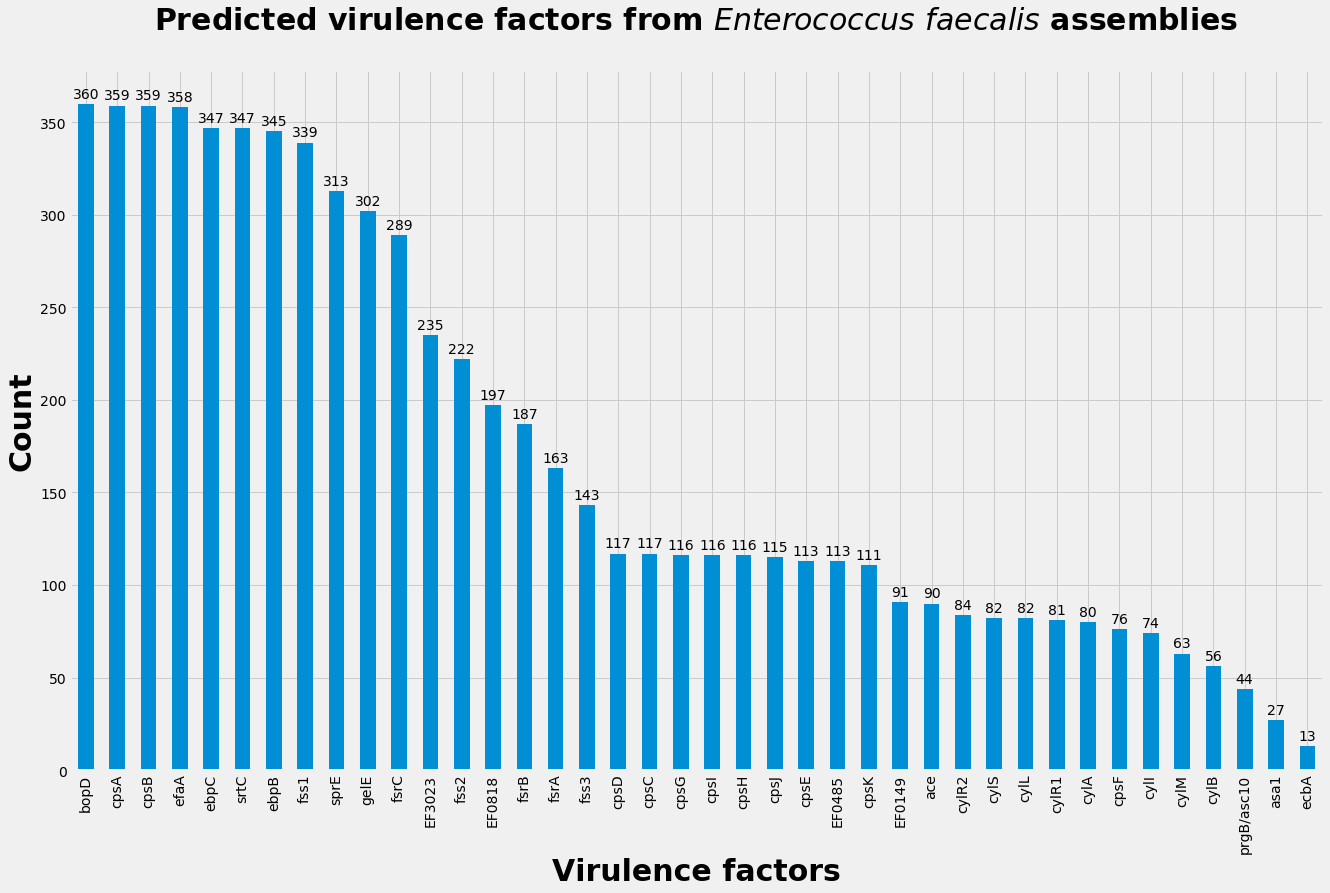

In [142]:
#Graph of all the virulence factors versus the number of times they appear in the assemblies

vfdb_series = vfdb_df["GENE"].value_counts().plot(kind='bar', figsize = (20,12))
ttl = plt.title(r"Predicted virulence factors from $Enterococcus$ $faecalis$ assemblies", fontsize = 30, fontweight = 'bold')
ttl.set_position([.5,1.05])
plt.xlabel("Virulence factors", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
          
for p in vfdb_series.patches:
    vfdb_series.annotate(format(p.get_height()), (p.get_x() + p.get_width() /2, p.get_height()), ha = 'center', \
                     va = 'center', xytext = (0, 10), textcoords = 'offset points')

